# Market segmentation

Consider the data in social_marketing.csv. This was data collected in the course of a market-research study using followers of the Twitter account of a large consumer brand that shall remain nameless---let's call it "NutrientH20" just to have a label. The goal here was for NutrientH20 to understand its social-media audience a little bit better, so that it could hone its messaging a little more sharply.

A bit of background on the data collection: the advertising firm who runs NutrientH20's online-advertising campaigns took a sample of the brand's Twitter followers. They collected every Twitter post ("tweet") by each of those followers over a seven-day period in June 2014. Every post was examined by a human annotator contracted through Amazon's Mechanical Turk service. Each tweet was categorized based on its content using a pre-specified scheme of 36 different categories, each representing a broad area of interest (e.g. politics, sports, family, etc.) Annotators were allowed to classify a post as belonging to more than one category. For example, a hypothetical post such as "I'm really excited to see grandpa go wreck shop in his geriatic soccer league this Sunday!" might be categorized as both "family" and "sports." You get the picture.

Each row of social_marketing.csv represents one user, labeled by a random (anonymous, unique) 9-digit alphanumeric code. Each column represents an interest, which are labeled along the top of the data file. The entries are the number of posts by a given user that fell into the given category. Two interests of note here are "spam" (i.e. unsolicited advertising) and "adult" (posts that are pornographic, salacious, or explicitly sexual). There are a lot of spam and pornography "bots" on Twitter; while these have been filtered out of the data set to some extent, there will certainly be some that slip through. There's also an "uncategorized" label. Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories. (A lot of annotators may used the "chatter" category for this as well.) Keep in mind as you examine the data that you cannot expect perfect annotations of all posts. Some annotators might have simply been asleep at the wheel some, or even all, of the time! Thus there is some inevitable error and noisiness in the annotation process.

Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('social_marketing.csv')
df.rename(columns={'Unnamed: 0':'user'}, inplace=True)
df.head()

,user,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [113]:
df.shape

(7882, 37)

In [114]:
df.columns

Index(['user', 'chatter', 'current_events', 'travel', 'photo_sharing',
       'uncategorized', 'tv_film', 'sports_fandom', 'politics', 'food',
       'family', 'home_and_garden', 'music', 'news', 'online_gaming',
       'shopping', 'health_nutrition', 'college_uni', 'sports_playing',
       'cooking', 'eco', 'computers', 'business', 'outdoors', 'crafts',
       'automotive', 'art', 'religion', 'beauty', 'parenting', 'dating',
       'school', 'personal_fitness', 'fashion', 'small_business', 'spam',
       'adult'],
      dtype='object')

In [115]:
#Dropping the columns of chatter and uncategorized as they do not explain any useful user characteristics
df.drop(columns=['uncategorized'], axis=1, inplace=True)
df.drop(columns=['chatter'], axis=1, inplace=True)
df.head()

,user,current_events,travel,photo_sharing,tv_film,sports_fandom,politics,food,family,home_and_garden,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,0,2,2,1,1,0,4,1,2,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,2,1,1,4,1,2,2,1,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,3,4,3,5,0,2,1,1,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,5,2,2,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,2,0,6,0,0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [116]:
numeric_df = df.drop(columns=['user'])

# Get the column name with the maximum value for each row
df['topic'] = numeric_df.idxmax(axis=1)

df.head()

,user,current_events,travel,photo_sharing,tv_film,sports_fandom,politics,food,family,home_and_garden,...,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult,topic
0,hmjoe4g3k,0,2,2,1,1,0,4,1,2,...,0,1,1,0,11,0,0,0,0,health_nutrition
1,clk1m5w8s,3,2,1,1,4,1,2,2,1,...,0,0,1,4,0,0,0,0,0,sports_fandom
2,jcsovtak3,3,4,3,5,0,2,1,1,1,...,1,0,1,0,0,1,0,0,0,art
3,3oeb4hiln,5,2,2,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,current_events
4,fd75x1vgk,2,0,6,0,0,2,0,1,0,...,0,0,0,0,0,0,1,0,0,photo_sharing


In [117]:
#Checking if there is any user who has 0 interests along all the column

features_df= df.drop(columns=['user','topic'],axis=1)
features_df.loc[(df==0).all(axis=1)]

,current_events,travel,photo_sharing,tv_film,sports_fandom,politics,food,family,home_and_garden,music,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult


In [118]:
# from sklearn.preprocessing import StandardScaler

# features_df = StandardScaler().fit_transform(features_df)

In [119]:
features_df.shape

(7882, 34)

In [120]:
from sklearn.decomposition import PCA
pca= PCA(n_components=25, random_state=41)
pcs= pca.fit_transform(features_df)


In [121]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.21172621 0.12721821 0.11375974 0.10789941 0.08119978 0.05432407
 0.03571758 0.03207291 0.02642297 0.02575586 0.01628785 0.01468004
 0.01299357 0.01257594 0.01185802 0.01157341 0.01001751 0.00925603
 0.00899377 0.00760737 0.00735095 0.00695426 0.00649748 0.00636052
 0.00600939]


([<matplotlib.axis.XTick at 0x244807a66d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

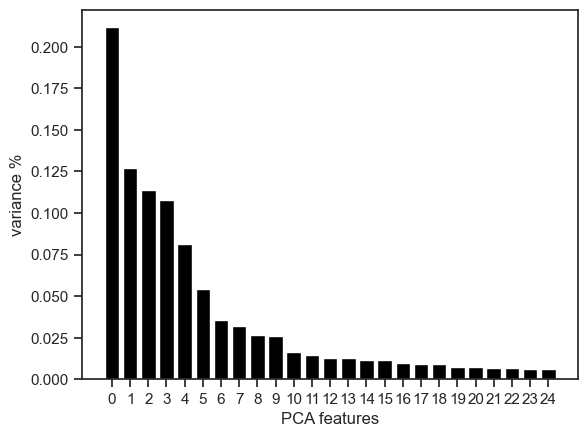

In [122]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)


In [123]:
# Looks like PC1 to PC5 explain most of the variablility, lets calculate how much
print(pca.explained_variance_ratio_[:6].sum())
# It's ~70%, lets add some more so that we can explain around 85%

print(pca.explained_variance_ratio_[:13].sum())

# Let's choose PC1 through PC12

# Save components to a DataFrame
PCA_components = pd.DataFrame(pcs)
PCA_components=PCA_components.iloc[:, : 13]

PCA_components.head()

0.6961274120323552
0.8600581886789138


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,16.729841,-5.781710,0.523307,0.961419,-0.008719,-0.466897,-1.386748,-1.021879,-0.738603,-0.246552,-0.253302,-0.124009,-2.293447
1,-3.712423,-2.065565,0.487579,-0.675072,2.438064,-0.722874,-0.912538,-0.448891,0.080321,0.927861,-0.101082,-0.236804,-0.020191
2,-2.645891,0.883975,0.430362,-1.958603,-1.852047,0.426422,-4.556198,6.911040,0.001432,0.066115,-2.948320,0.760267,0.138848
3,-3.898102,-2.021506,-0.631202,-0.446807,-1.582846,0.000415,-1.583068,1.062764,-0.432591,-0.182892,-0.471521,-0.305435,-0.583292
4,-3.073525,1.443748,-2.195319,1.911200,-2.589459,3.171191,0.679500,-1.600738,-0.725984,-0.365785,-0.229463,-0.812791,0.190078


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



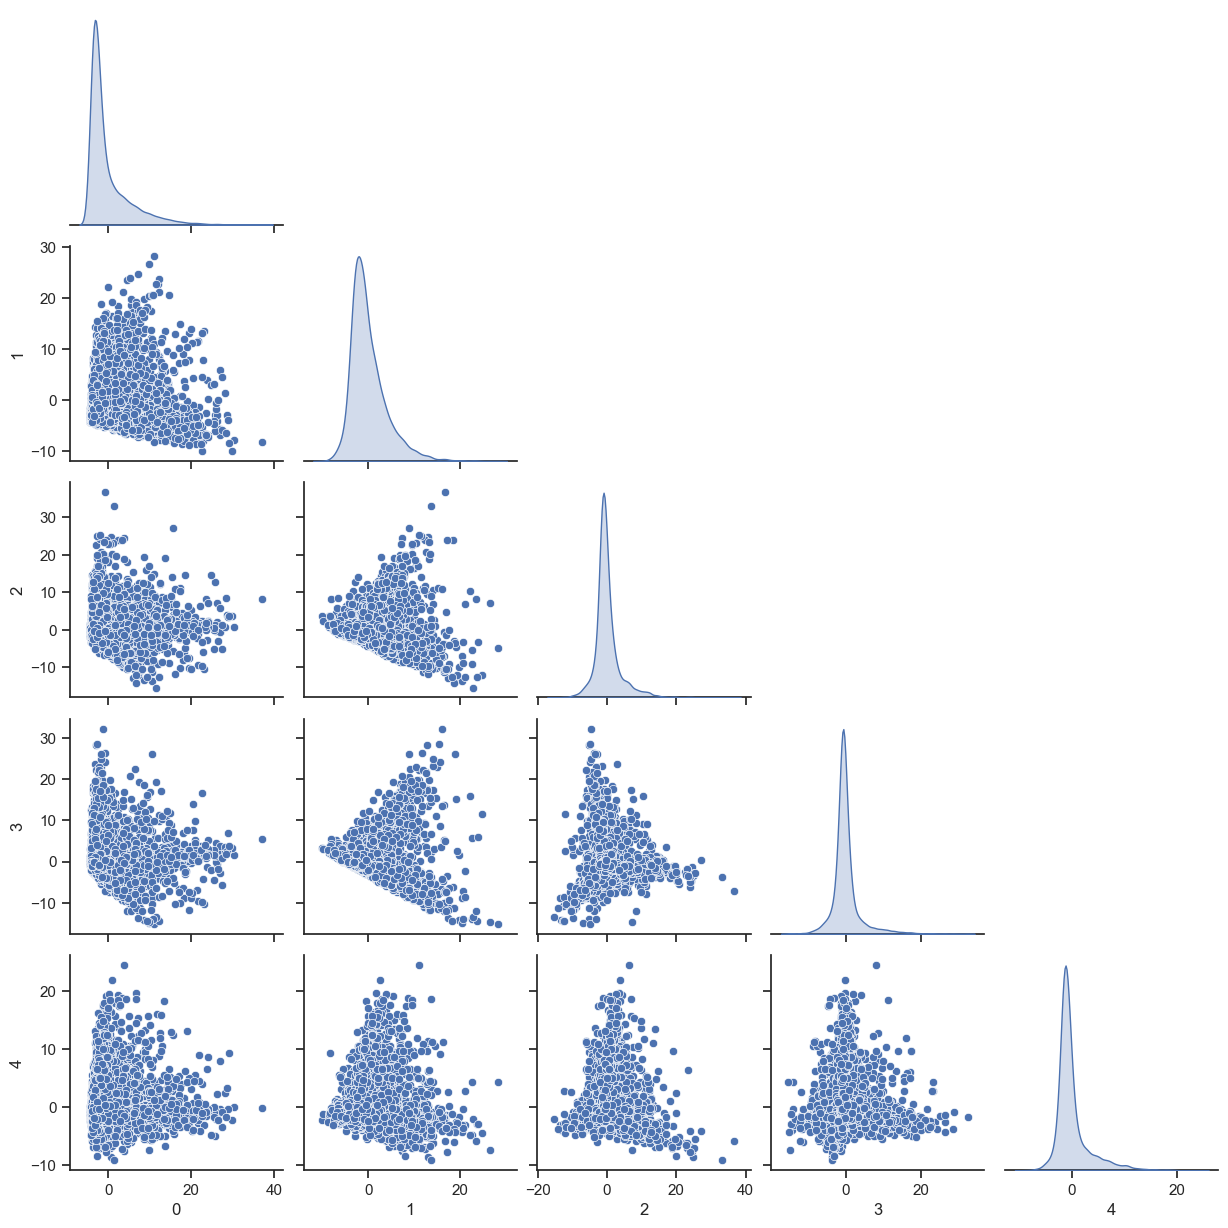

In [124]:
#Trying to find groups through scatter plots if evident clusters are found between principal components 1 to 5

# Create scatter plots between 5 columns
sns.set(style="ticks")
sns.pairplot(PCA_components[[0,1,2,3,4]], diag_kind='kde',corner=True)

# Display the plots
plt.show()

In [125]:
# Could not observe anything significant, lets try to visualize the Principal components through tSNE

In [126]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(PCA_components)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7882 samples in 0.008s...
[t-SNE] Computed neighbors for 7882 samples in 0.616s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7882
[t-SNE] Computed conditional probabilities for sample 2000 / 7882
[t-SNE] Computed conditional probabilities for sample 3000 / 7882
[t-SNE] Computed conditional probabilities for sample 4000 / 7882
[t-SNE] Computed conditional probabilities for sample 5000 / 7882
[t-SNE] Computed conditional probabilities for sample 6000 / 7882
[t-SNE] Computed conditional probabilities for sample 7000 / 7882
[t-SNE] Computed conditional probabilities for sample 7882 / 7882
[t-SNE] Mean sigma: 1.347153
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.889671
[t-SNE] KL divergence after 1000 iterations: 1.716479


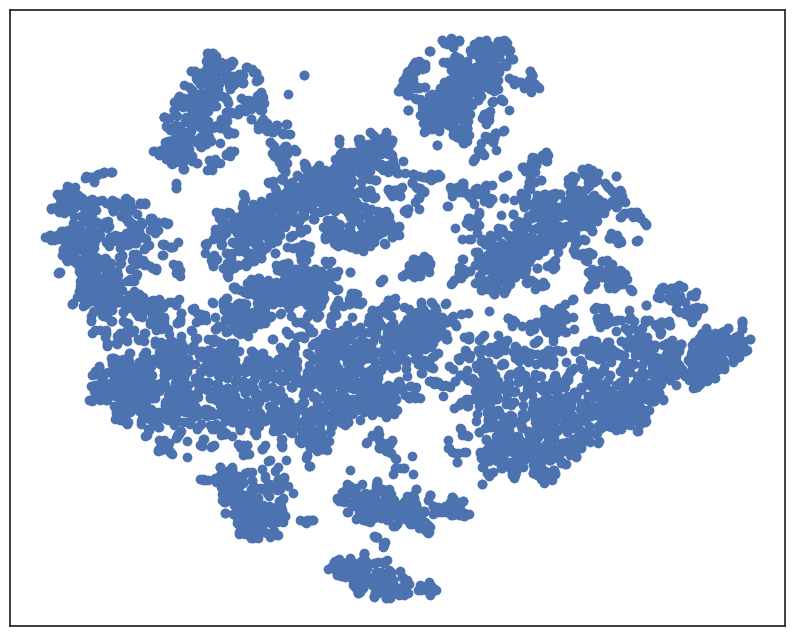

In [127]:
plt.figure(figsize=(10,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.show()

In [162]:
import plotly.express as px
import random
# convert the t-SNE results to a DataFrame
tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])

# add the county names to this DataFrame
tsne_df['Topic'] = df['topic'].values

topic_counts = df['topic'].value_counts()


# Get the top 75% topics by count
top_topics = topic_counts.index[:round(len(df['topic'].unique())*0.75)]

# Create a dictionary to map topic to color
color_map = {topic: 'white' if topic not in top_topics else "#{:06x}".format(random.randint(0, 0xFFFFFF)) for topic in tsne_df['Topic'].unique() if topic != 'white'}

# Create an interactive plot and color the points based on the color map
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', hover_data=['Topic'], color='Topic', color_discrete_map=color_map)

# Set the height of the plot to elongate it
fig.update_layout(height=800)

# Show the plot
fig.show()

Alhough we can get the most frequent topics just by value counts, these topics can be far apart in the Dim1-Dim2 plot

Just by the look of the plot, we can make the following observations about the user clusters

By looking at this plot, in the order of size, we can observe big clusters of 
 - Photo Sharing with Shopping and Current events
 - Health Nutrition with personal fitness
 - Cooking
 - College uni and online gaming
 - News, politics and travel

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

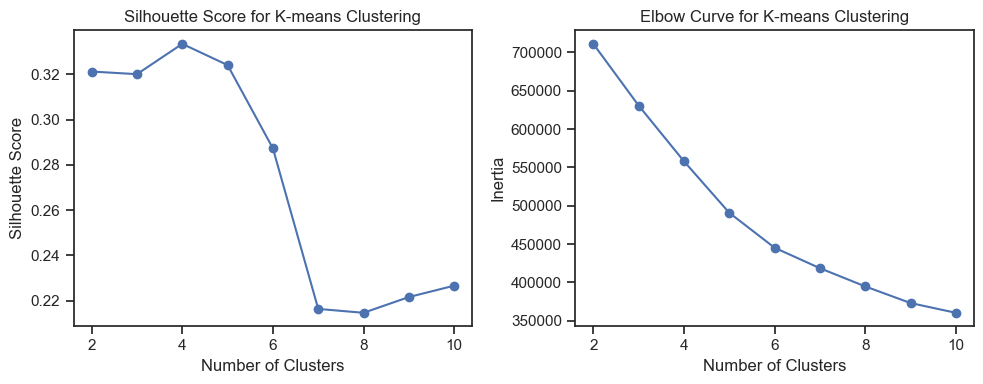

In [130]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
inertia_values = []

for k in range(2, 11):  # Start from 2 clusters as silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(PCA_components)
    
    # Calculate silhouette score and inertia for each k
    silhouette_scores.append(silhouette_score(PCA_components, kmeans.labels_))
    inertia_values.append(kmeans.inertia_)

# Plot silhouette scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')

# Plot the elbow curve
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')

plt.tight_layout()
plt.show()

In [131]:
# Based on the above plots, lets try to visualize the clusters based on 4 and 5 clusters respectively

# Perform K-means++ clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(PCA_components)

PCA_components_original= PCA_components.copy()

PCA_components['cluster'] = cluster_labels

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [133]:
#Merge the original dataframe with cluster information to analyze the clusters
concatenated_df = pd.concat([df, PCA_components[['cluster']]], axis=1)

#We do not need our user column and our topic column that we previously created
concatenated_df.drop(columns=['user','topic'], axis=1, inplace=True)

concatenated_df.head()

,current_events,travel,photo_sharing,tv_film,sports_fandom,politics,food,family,home_and_garden,music,...,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult,cluster
0,0,2,2,1,1,0,4,1,2,0,...,0,1,1,0,11,0,0,0,0,2
1,3,2,1,1,4,1,2,2,1,0,...,0,0,1,4,0,0,0,0,0,1
2,3,4,3,5,0,2,1,1,1,1,...,1,0,1,0,0,1,0,0,0,1
3,5,2,2,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,2,0,6,0,0,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [134]:
cluster_analysis = concatenated_df.groupby('cluster').mean()  # Calculate mean values for each cluster
cluster_analysis.head()

,current_events,travel,photo_sharing,tv_film,sports_fandom,politics,food,family,home_and_garden,music,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.463801,1.633484,2.739819,1.416290,1.633484,1.545249,1.468326,1.135747,0.561086,0.798643,...,1.040724,0.533937,0.972851,0.739819,0.676471,1.018100,0.927602,0.434389,0.009050,0.459276
1,1.498515,1.583610,2.357680,1.050149,1.605976,1.861436,1.236240,0.818277,0.487507,0.604753,...,1.076359,0.445046,0.882404,0.642146,0.744714,0.649485,0.575922,0.322034,0.006640,0.416914
2,1.573464,1.495102,2.623330,1.055209,1.535174,1.581478,2.238646,0.925200,0.624221,0.739092,...,1.109528,0.533393,1.007124,1.063224,0.768477,5.869991,0.820125,0.290294,0.006233,0.311665
3,1.750842,1.732323,6.070707,1.035354,1.560606,1.659933,1.308081,0.984848,0.614478,1.195286,...,1.292929,3.663300,1.095960,0.685185,1.055556,1.287879,5.434343,0.488215,0.003367,0.404040


In [135]:
cluster_info_dict = {}

# Iterate over each cluster
for cluster in cluster_analysis.index:
    # Sort the topics within the cluster based on their mean values
    sorted_topics = cluster_analysis.loc[cluster].sort_values(ascending=False)
    
    # Extract the top 3 topics (excluding 'cluster' column)
    top_topics = sorted_topics.index[0:4].tolist()  # Corrected index range

    # Extract corresponding mean values for those topics
    top_values = sorted_topics.values[0:4].tolist()
    
    # Calculate the cluster size (number of data points in the cluster)
    cluster_size = len(concatenated_df[concatenated_df['cluster'] == cluster])
    
    # Store the top topics and cluster size in the dictionary
    cluster_info_dict[cluster] = {'top_topics': top_topics, 'cluster_size': cluster_size, 'top_values':top_values}

# Display the top topics and cluster sizes for each cluster
for cluster, info in cluster_info_dict.items():
    top_topics = ', '.join(info['top_topics'])
    top_values = info['top_values']
    cluster_size = info['cluster_size']
    print(f"Cluster {cluster}: Top 4 Topics - {top_topics}, Corresponding mean values- {top_values}, Cluster Size: {cluster_size}")

Cluster 0: Top 3 Topics - college_uni, online_gaming, photo_sharing, sports_playing, Corresponding mean values- [10.529411764705882, 10.072398190045249, 2.739819004524887, 2.432126696832579], Cluster Size: 442
Cluster 1: Top 3 Topics - photo_sharing, politics, sports_fandom, travel, Corresponding mean values- [2.357679538703477, 1.8614363096278175, 1.6059758867726717, 1.583609994757994], Cluster Size: 5723
Cluster 2: Top 3 Topics - health_nutrition, personal_fitness, cooking, photo_sharing, Corresponding mean values- [11.743544078361532, 5.869991095280499, 3.210151380231523, 2.6233303650934996], Cluster Size: 1123
Cluster 3: Top 3 Topics - cooking, photo_sharing, fashion, beauty, Corresponding mean values- [11.303030303030303, 6.070707070707071, 5.434343434343434, 3.6632996632996635], Cluster Size: 594


This cluster analysis revealed distinct topic preferences and strengths within different clusters.

Cluster 0: Centered on "college_uni" and "online_gaming," with a focus on "photo_sharing" and "sports_playing," reflecting an interest in education, gaming, and sports.

Cluster 1: Emphasizes "photo_sharing" and "politics," while also showing interest in "sports_fandom" and "travel," suggesting engagement in current affairs, sports, and travel.
`
Cluster 2: Primarily revolves around "health_nutrition" and "personal_fitness," accompanied by interest in "cooking" and "photo_sharing," signifying health-conscious behaviors and culinary interests.

Cluster 3: Showcases a blend of "cooking," "photo_sharing," "fashion," and "beauty," revealing an affinity for cooking, fashion trends, and beauty-related content.

In [155]:
# Perform K-means++ clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

PCA_components = PCA_components_original.copy()
cluster_labels = kmeans.fit_predict(PCA_components)



PCA_components['cluster'] = cluster_labels

#Merge the original dataframe with cluster information to analyze the clusters
concatenated_df = pd.concat([df, PCA_components[['cluster']]], axis=1)

#We do not need our user column and our topic column that we previously created
concatenated_df.drop(columns=['user','topic'], axis=1, inplace=True)

cluster_analysis = concatenated_df.groupby('cluster').mean()  # Calculate mean values for each cluster

cluster_info_dict = {}

# Iterate over each cluster
for cluster in cluster_analysis.index:
    # Sort the topics within the cluster based on their mean values
    sorted_topics = cluster_analysis.loc[cluster].sort_values(ascending=False)
    
    # Extract the top 3 topics (excluding 'cluster' column)
    top_topics = sorted_topics.index[0:4].tolist()  # Corrected index range

    # Extract corresponding mean values for those topics
    top_values = sorted_topics.values[0:4].tolist()
    
    # Calculate the cluster size (number of data points in the cluster)
    cluster_size = len(concatenated_df[concatenated_df['cluster'] == cluster])
    
    # Store the top topics and cluster size in the dictionary
    cluster_info_dict[cluster] = {'top_topics': top_topics, 'cluster_size': cluster_size, 'top_values':top_values}

# Display the top topics and cluster sizes for each cluster
for cluster, info in cluster_info_dict.items():
    top_topics = ', '.join(info['top_topics'])
    top_values = info['top_values']
    cluster_size = info['cluster_size']
    print(f"Cluster {cluster}: Top 4 Topics - {top_topics}, Corresponding mean values- {top_values}, Cluster Size: {cluster_size}")

Cluster 0: Top 4 Topics - cooking, photo_sharing, fashion, beauty, Corresponding mean values- [11.460456942003514, 6.054481546572935, 5.506151142355009, 3.727592267135325], Cluster Size: 569
Cluster 1: Top 4 Topics - health_nutrition, personal_fitness, cooking, photo_sharing, Corresponding mean values- [11.881970260223047, 5.952602230483271, 3.2481412639405205, 2.637546468401487], Cluster Size: 1076
Cluster 2: Top 4 Topics - college_uni, online_gaming, photo_sharing, sports_playing, Corresponding mean values- [10.626168224299066, 10.179906542056075, 2.7406542056074765, 2.439252336448598], Cluster Size: 428
Cluster 3: Top 4 Topics - photo_sharing, sports_fandom, current_events, shopping, Corresponding mean values- [2.3639749117992945, 1.5147001176009407, 1.4803998431987455, 1.3388867110936888], Cluster Size: 5102
Cluster 4: Top 4 Topics - politics, travel, news, photo_sharing, Corresponding mean values- [9.142857142857142, 5.678925035360679, 5.141442715700141, 2.45968882602546], Cluster

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



This cluster analysis provides insights into diverse topic preferences and strengths within distinct clusters.

Cluster 0: Focused on "cooking," "photo_sharing," "fashion," and "beauty," showcasing a combination of interests in culinary arts and style.

Cluster 1: Highlights "health_nutrition" and "personal_fitness," coupled with "cooking" and "photo_sharing," indicating a health-conscious segment with culinary inclinations.

Cluster 2: Centers on "college_uni" and "online_gaming," accompanied by "photo_sharing" and "sports_playing," representing an audience engaged in education, gaming, and sports.

Cluster 3: Emphasizes "photo_sharing," "sports_fandom," "current_events," and "shopping," suggesting an interest in photography, sports, current affairs, and shopping.

Cluster 4: Showcases "politics," "travel," "news," and "photo_sharing," portraying an engaged group interested in politics, travel, and current events.

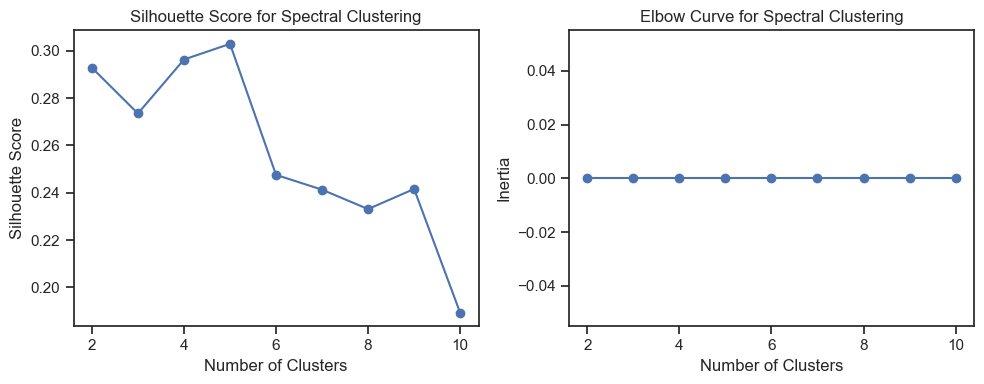

In [148]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

PCA_components = PCA_components_original.copy()

silhouette_scores = []
inertia_values = []

for k in range(2, 11):  # Start from 2 clusters as silhouette score requires at least 2 clusters
    spectral_clustering = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors')
    labels = spectral_clustering.fit_predict(PCA_components)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(PCA_components, labels))
    
    # Inertia is not applicable for spectral clustering, but you can use a placeholder value
    inertia_values.append(0.0)

# Plot silhouette scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Spectral Clustering')

# Plot the elbow curve (use placeholder values)
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Spectral Clustering')

plt.tight_layout()
plt.show()

In [ ]:
# From this Silhoutte plot we will try the optimal number of clusters as 4 and 5

In [156]:
from sklearn.cluster import SpectralClustering


# Specify the number of clusters for spectral clustering
n_clusters = 4

# Initialize SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors')

# Perform spectral clustering and get cluster labels
cluster_labels = spectral_clustering.fit_predict(PCA_components_original)

# Copy PCA_components_original to avoid modifying the original data
PCA_components = PCA_components_original.copy()

# Add cluster labels to PCA_components DataFrame
PCA_components['cluster'] = cluster_labels

# Merge the original dataframe with cluster information to analyze the clusters
concatenated_df = pd.concat([df, PCA_components[['cluster']]], axis=1)

# Drop unnecessary columns
concatenated_df.drop(columns=['user', 'topic'], axis=1, inplace=True)

# Calculate mean values for each cluster
cluster_analysis = concatenated_df.groupby('cluster').mean()

# Create a dictionary to store cluster information
cluster_info_dict = {}

# Iterate over each cluster
for cluster in cluster_analysis.index:
    # Sort the topics within the cluster based on their mean values
    sorted_topics = cluster_analysis.loc[cluster].sort_values(ascending=False)
    
    # Extract the top 4 topics (excluding 'cluster' column)
    top_topics = sorted_topics.index[0:4].tolist()

    # Extract corresponding mean values for those topics
    top_values = sorted_topics.values[0:4].tolist()
    
    # Calculate the cluster size (number of data points in the cluster)
    cluster_size = len(concatenated_df[concatenated_df['cluster'] == cluster])
    
    # Store the top topics and cluster size in the dictionary
    cluster_info_dict[cluster] = {'top_topics': top_topics, 'cluster_size': cluster_size, 'top_values': top_values}

# Display the top topics and cluster sizes for each cluster
for cluster, info in cluster_info_dict.items():
    top_topics = ', '.join(info['top_topics'])
    top_values = info['top_values']
    cluster_size = info['cluster_size']
    print(f"Cluster {cluster}: Top 4 Topics - {top_topics}, Corresponding mean values - {top_values}, Cluster Size: {cluster_size}")

Cluster 0: Top 4 Topics - college_uni, online_gaming, photo_sharing, sports_playing, Corresponding mean values - [10.283185840707965, 10.008849557522124, 2.732300884955752, 2.3871681415929205], Cluster Size: 452
Cluster 1: Top 4 Topics - health_nutrition, personal_fitness, cooking, photo_sharing, Corresponding mean values - [10.589051094890511, 5.32043795620438, 3.77007299270073, 2.745255474452555], Cluster Size: 1370
Cluster 2: Top 4 Topics - photo_sharing, sports_fandom, cooking, current_events, Corresponding mean values - [2.7075488613950154, 1.660749506903353, 1.6361843284920208, 1.5239376008606778], Cluster Size: 5577
Cluster 3: Top 4 Topics - politics, travel, news, computers, Corresponding mean values - [10.612836438923395, 7.399585921325052, 4.6645962732919255, 3.0973084886128364], Cluster Size: 483


This cluster analysis uncovers significant topic preferences within distinct clusters.

Cluster 0: Focused on "college_uni," "online_gaming," "photo_sharing," and "sports_playing," indicating an audience engaged in education, gaming, and sports-related activities.

Cluster 1: Highlights "health_nutrition," "personal_fitness," "cooking," and "photo_sharing," suggesting a health-conscious segment with culinary interests.

Cluster 2: Centers around "photo_sharing," "sports_fandom," "cooking," and "current_events," depicting an audience enthusiastic about photography, sports, and current affairs.

Cluster 3: Emphasizes "politics," "travel," "news," and "computers," revealing a tech-savvy group interested in politics, travel, and technology.

In [157]:
from sklearn.cluster import SpectralClustering


# Specify the number of clusters for spectral clustering
n_clusters = 5

# Initialize SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors')

# Perform spectral clustering and get cluster labels
cluster_labels = spectral_clustering.fit_predict(PCA_components_original)

# Copy PCA_components_original to avoid modifying the original data
PCA_components = PCA_components_original.copy()

# Add cluster labels to PCA_components DataFrame
PCA_components['cluster'] = cluster_labels

# Merge the original dataframe with cluster information to analyze the clusters
concatenated_df = pd.concat([df, PCA_components[['cluster']]], axis=1)

# Drop unnecessary columns
concatenated_df.drop(columns=['user', 'topic'], axis=1, inplace=True)

# Calculate mean values for each cluster
cluster_analysis = concatenated_df.groupby('cluster').mean()

# Create a dictionary to store cluster information
cluster_info_dict = {}

# Iterate over each cluster
for cluster in cluster_analysis.index:
    # Sort the topics within the cluster based on their mean values
    sorted_topics = cluster_analysis.loc[cluster].sort_values(ascending=False)
    
    # Extract the top 4 topics (excluding 'cluster' column)
    top_topics = sorted_topics.index[0:4].tolist()

    # Extract corresponding mean values for those topics
    top_values = sorted_topics.values[0:4].tolist()
    
    # Calculate the cluster size (number of data points in the cluster)
    cluster_size = len(concatenated_df[concatenated_df['cluster'] == cluster])
    
    # Store the top topics and cluster size in the dictionary
    cluster_info_dict[cluster] = {'top_topics': top_topics, 'cluster_size': cluster_size, 'top_values': top_values}

# Display the top topics and cluster sizes for each cluster
for cluster, info in cluster_info_dict.items():
    top_topics = ', '.join(info['top_topics'])
    top_values = info['top_values']
    cluster_size = info['cluster_size']
    print(f"Cluster {cluster}: Top 4 Topics - {top_topics}, Corresponding mean values - {top_values}, Cluster Size: {cluster_size}")

Cluster 0: Top 4 Topics - health_nutrition, personal_fitness, cooking, photo_sharing, Corresponding mean values - [10.797079169869331, 5.41967717140661, 3.050730207532667, 2.46272098385857], Cluster Size: 1301
Cluster 1: Top 4 Topics - photo_sharing, sports_fandom, current_events, shopping, Corresponding mean values - [2.4528076463560335, 1.6885702907208284, 1.5145360414177618, 1.3908801274392673], Cluster Size: 5022
Cluster 2: Top 4 Topics - college_uni, online_gaming, photo_sharing, sports_playing, Corresponding mean values - [10.197752808988763, 10.004494382022472, 2.6449438202247193, 2.3797752808988766], Cluster Size: 445
Cluster 3: Top 4 Topics - politics, travel, news, computers, Corresponding mean values - [10.424849699398798, 7.152304609218437, 4.69939879759519, 2.9779559118236474], Cluster Size: 499
Cluster 4: Top 4 Topics - cooking, photo_sharing, fashion, beauty, Corresponding mean values - [10.930081300813008, 5.588617886178862, 5.240650406504065, 3.5658536585365854], Clust

Cluster 0: Centered on "health_nutrition," "personal_fitness," "cooking," and "photo_sharing," this group exhibits a health-conscious focus with culinary and wellness interests.

Cluster 1: Emphasizes "photo_sharing," "sports_fandom," "current_events," and "shopping," indicating an engagement with photography, sports, current affairs, and shopping.

Cluster 2: Highlights "college_uni," "online_gaming," "photo_sharing," and "sports_playing," suggesting an audience interested in education, online gaming, and sports-related content.

Cluster 3: Focused on "politics," "travel," "news," and "computers," this cluster indicates an engagement with political news, travel content, and technology.

Cluster 4: Revolves around "cooking," "photo_sharing," "fashion," and "beauty," portraying interests in culinary arts, photography, fashion, and beauty.